In [1]:
import pandas as pd
import numpy as np


In [2]:
archivo = 'csv_creados/df_infl_tva.csv'
df_infl_tva = pd.read_csv(archivo)

In [3]:
archivo = 'csv_creados/df_infl.csv'
df_infl = pd.read_csv(archivo)

In [4]:
df_infl.head(2) # Datos en términos absolutos

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016),GDP (constant LCU),Velocity of M2
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807,6.172503e-12,182932009390,6.382836
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.213136,7.426182e-12,192861271430,7.273797


In [5]:
df_infl_tva.head(2) # Datos en términos relativos

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M2_gr
0,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.277738,0.203107,0.054278,0.139587
1,1962-12-31,Pesos,0.080916,0.008348,0.034162,0.043666,0.189245,0.288718,-0.008520,0.149960


#### Vamos a estudiar cómo ha sido el crecimiento de las variables GDP_real y Velocity M2

In [6]:
df_infl_tva['GDP_Real_gr'].describe()

count    62.000000
mean      0.023962
std       0.055189
min      -0.108945
25%      -0.020139
50%       0.028151
75%       0.067390
max       0.107180
Name: GDP_Real_gr, dtype: float64

In [7]:
df_infl_tva['Año'] = pd.to_datetime(df_infl_tva['Año'])

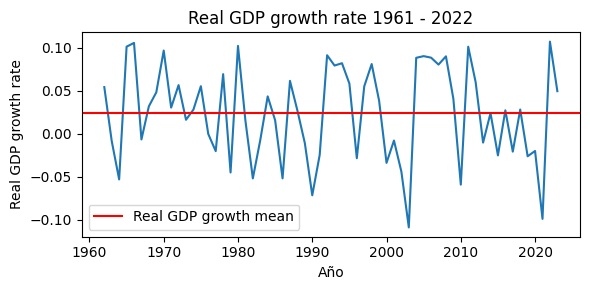

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 3))
plt.title('Real GDP growth rate 1961 - 2022')
plt.xlabel('Año')
plt.ylabel('Real GDP growth rate')

plt.plot(df_infl_tva['Año'], df_infl_tva['GDP_Real_gr'])

y_line = df_infl_tva['GDP_Real_gr'].mean()

plt.axhline(y=y_line, color='r', linestyle='-', label='Real GDP growth mean')

plt.legend()

plt.tight_layout()
plt.show()

Podemos comprobar que historicamente, el crecimiento del PIB real se ha mantenido en un intervalo de (-0.10, 0.10) con una media de 2.23% y una desviación estandar del 5.51%.

In [9]:
df_infl_tva = df_infl_tva.dropna()

In [10]:
df_infl_tva['Velocity M2_gr'].describe()

count    62.000000
mean      0.131383
std       0.784399
min      -0.792759
25%      -0.098905
50%       0.021596
75%       0.138692
max       5.568278
Name: Velocity M2_gr, dtype: float64

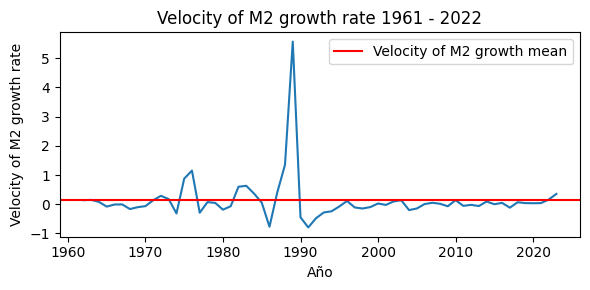

In [11]:
plt.figure(figsize=(6, 3))
plt.title('Velocity of M2 growth rate 1961 - 2022')
plt.xlabel('Año')
plt.ylabel('Velocity of M2 growth rate')

plt.plot(df_infl_tva['Año'], df_infl_tva['Velocity M2_gr'])

y_line = df_infl_tva['Velocity M2_gr'].mean()

plt.axhline(y=y_line, color='r', linestyle='-', label='Velocity of M2 growth mean')

plt.legend()

plt.tight_layout()
plt.show()

Salvo outliers, la velocidad de M2 se ha mantenido a unas tasas de crecimiento constantes y cercanas a la media (13.13%)

#### Analizamos ahora conjuntamente el crecimiento de M2 y la Inflacion

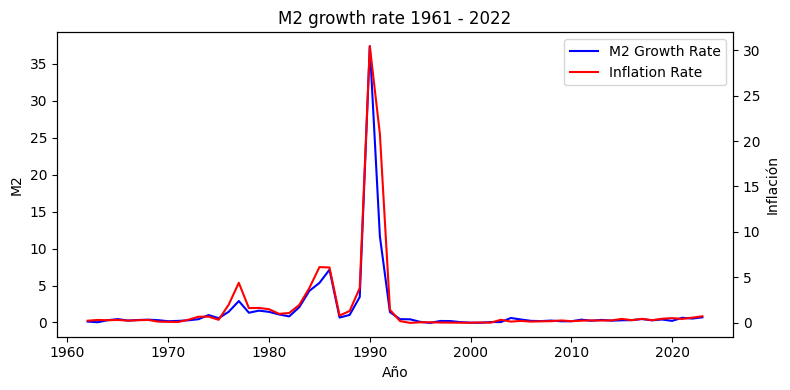

In [12]:
fig, ax1 = plt.subplots(figsize=(8, 4))


ax1.set_title('M2 growth and Inflation 1961 - 2022')
ax1.set_xlabel('Año')
ax1.set_ylabel('M2')
ax1.plot(df_infl_tva['Año'], df_infl_tva['M2_gr'], color='b', label='M2 Growth Rate')


ax2 = ax1.twinx()
ax2.set_ylabel('Inflación')  


ax2.plot(df_infl_tva['Año'], df_infl_tva['Inflation Rate'], color='r', label='Inflation Rate')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')


fig.tight_layout()
plt.show()


In [13]:
df_infl_tva[['M2_gr', 'Inflation Rate']].describe()

,M2_gr,Inflation Rate
count,62.000000,62.000000
mean,1.589729,1.609045
std,4.992247,4.698841
min,-0.052649,-0.035611
25%,0.218723,0.150494
50%,0.384106,0.288232
75%,0.963009,0.911659
max,37.395430,30.460912


Se puede observar que la media para las dos magnitudes es muy parecida (158.9% vs 177.53%) y mucho mayor que las observadas en el crecimiento del PIB y la velocidad de M2 (2.39% y 13.13% respectivamente). Por lo tanto, el efecto del crecimiento de la oferta monetaria, hace que los efectos que podrían tener las variables GDP_Real y Velocity of M2 sean residuales. Es por ello, que podemos asumir que el crecimiento de esas dos variables ha sido constante a lo largo del tiempo y enfocaremos nuestro analisis en los efectos que ha tenido el crecimiento de la oferta monetaria en la inflación argentina

#### Gráficamos una matriz de correlación para las variables filtradas

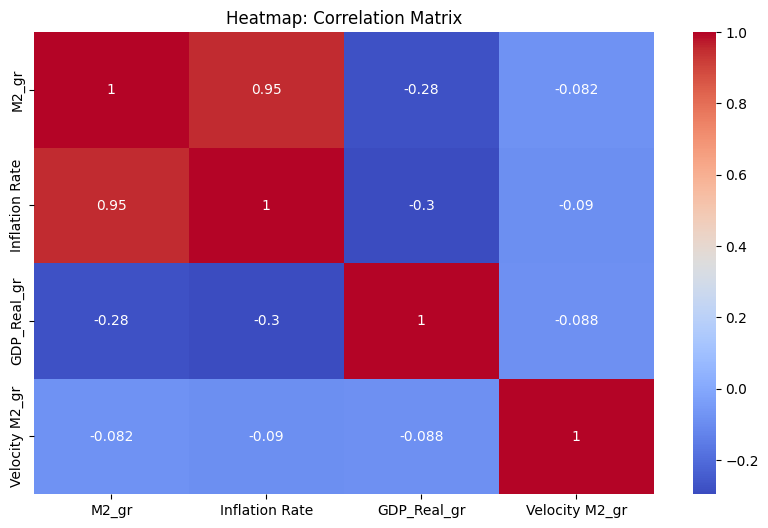

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de calor para las correlaciones entre variables numéricas
numerical_columns = ['M2_gr','Inflation Rate','GDP_Real_gr','Velocity M2_gr']
correlation_matrix = df_infl_tva[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()


#### Regresion Lineal Simple CPI y M2

In [15]:
from sklearn.linear_model import LinearRegression

x = np.array(df_infl_tva['M2_gr']).reshape((-1, 1))
y = np.array(df_infl_tva['Inflation Rate'])

model = LinearRegression()
model.fit(x, y)

intercept = model.intercept_
coef = model.coef_

r2 = model.score(x, y)

print(f'R^2: {r2}')

R^2: 0.9097566422528542


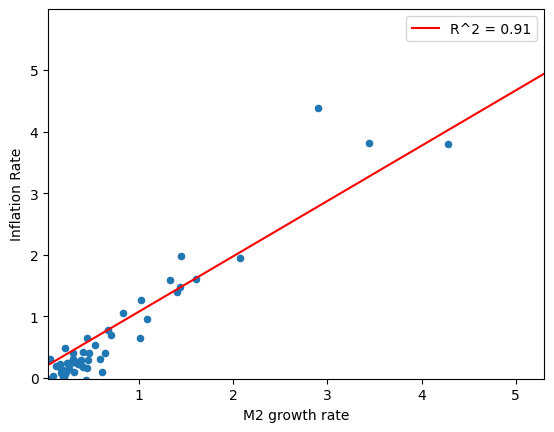

In [16]:
df_infl_tva.plot.scatter(x='M2_gr', y='Inflation Rate')


x_min, x_max = df_infl_tva['M2_gr'].quantile([0.05, 0.95])
y_min, y_max = df_infl_tva['Inflation Rate'].quantile([0.05, 0.95])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


x_line = np.linspace(x_min, x_max, 100)
y_line = coef * x_line + intercept

# Dibujar la línea de regresión
plt.plot(x_line, y_line, '-r', label=f'R^2 = {r2:.2f}')

# Añadir etiquetas y título
plt.xlabel('M2 growth rate')
plt.ylabel('Inflation Rate')
plt.legend()

# Mostrar el gráfico
plt.show()

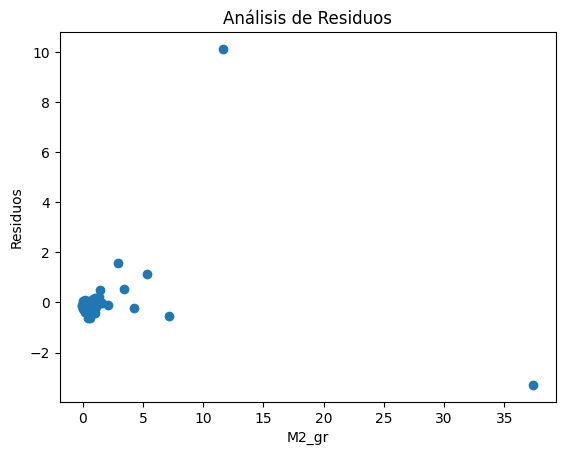

In [17]:
y_pred = model.predict(x)

residuals = y - y_pred

plt.scatter(x, residuals)

plt.xlabel('M2_gr')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')

plt.show()

<!-- Año GDP_gr	CPI_gr	Velocity_M2_gr                             # Realtiva
Año GDP (current LCU)	CPI (2016 = Base Yr)	Velocity of M2 # ABS -->

<!-- df_excel = pd.read_excel('Data_in\GDP_Real_Argentina.xls')
df = df.merge(df_excel, on='Año', how='left') -->